In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Считать данные в pandas dataframe.

In [2]:
data = pd.read_csv('ex1data1.csv')

# 2. Построить scatter plot зависимости прибыли от кол-ва людей в городе.

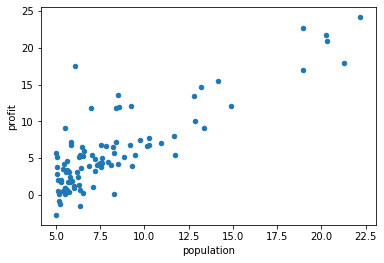

In [3]:
data.plot(y='profit', x='population', kind='scatter')
plt.show()

# 3. Найти матрицу Х и вектор у. Нормализировать данные. Добавить колонку единичек к матрице Х. 

In [4]:
x = np.array(data.values[:, :data.shape[1] - 1])
y = np.array(data.values[:, data.shape[1] - 1])

m_x = x.mean(axis=0)
std_x = x.std(axis=0)
x = (x - m_x)/std_x

x = np.hstack((x, np.ones(data.shape[0]).reshape(data.shape[0], 1)))

# 4. Написать фукнции mserror, linear_prediction в матричной форме (то есть НЕ через циклы)

In [5]:
def mserror(y, y_predict):
    return np.mean((y - y_predict)**2)

In [6]:
def lin_prediction(X, w):
    return np.dot(X, w)

Найдем коэффициенты из уравнения X * w = y:

In [7]:
def w_matrix(X, Y):
    return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))

In [8]:
%%time
w = w_matrix(x, y)
mse = mserror(y, lin_prediction(x, w))

CPU times: user 131 µs, sys: 46 µs, total: 177 µs
Wall time: 148 µs


In [9]:
print('W: {}. Linear prediction error (matrix form): {}'.format(w, mse))

W: [4.59304113 5.83913505]. Linear prediction error (matrix form): 8.953942751950358


w[0] - угловой коэффициент, w[1] - свободный член.

# 5. Найти коэффициенты линейной модели методами:

<div style="margin-left: 2em">Full batch gradient descent<br>
    Mini batch gradient descent<br>
    Stochastic gradient descent</div>

In [10]:
def gradient(X, Y, m, w, alpha):
    return alpha / m * np.dot(X.T, (Y - lin_prediction(X, w)))

In [11]:
def plot_mse(mse):
    plt.plot(range(len(mse)), mse)
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.show()

## 5.1. Full batch gradient descent

In [12]:
def full_batch_gradient_descent(x, y, w_init, n=2000, alpha=0.01):
    w = w_init
    mse = []
    for i in range(n):
        w += gradient(x, y, x.shape[0], w, alpha)
        mse.append(mserror(y, lin_prediction(x, w)))
    return w, mse

Найдем оптимальное количество эпох по функции ошибки:

In [13]:
_, mse = full_batch_gradient_descent(x, y, [4, 5], n=2000)

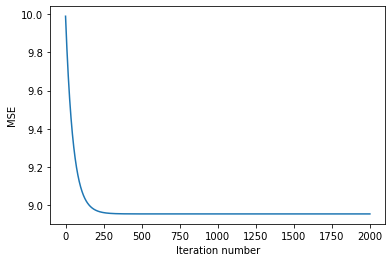

In [14]:
plot_mse(mse)

По графику видим, что после 1000 эпох ошибка практически не изменяется.

In [15]:
%%time
w, mse = full_batch_gradient_descent(x, y, [4, 5], n=1000)

CPU times: user 28.2 ms, sys: 2.58 ms, total: 30.8 ms
Wall time: 30.6 ms


In [16]:
print('W: {}. Full batch MSE: {}'.format(w, mse[-1]))

W: [4.59301553 5.83909883]. Full batch MSE: 8.953942753918195


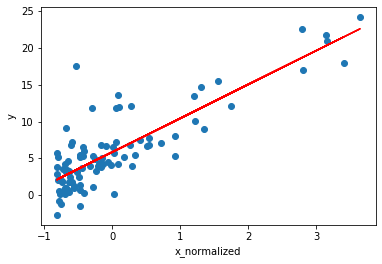

In [17]:
plt.scatter(x.T[0], y)
plt.plot(x.T[0], lin_prediction(x, w), c='r')
plt.xlabel('x_normalized')
plt.ylabel('y')
plt.show()

## 5.2. Mini batch gradient descent

In [18]:
def mini_batch_gradient_descent(x, y, w_init, batch_size=32, batch_num=5000, n=1, alpha=0.001):
    w = w_init
    mse = []
    for j in range(batch_num):
        mini_batch_index = np.random.randint(0, x.shape[0], batch_size)
        x_mini_batch = np.array([x[i] for i in mini_batch_index])
        y_mini_batch = np.array([y[i] for i in mini_batch_index])
        for i in range(n):
            w += gradient(x_mini_batch, y_mini_batch, batch_size, w, alpha)
            mse.append(mserror(y, lin_prediction(x, w)))
    return w, mse

Найдем оптимальное количество батчей и количество итераций на каждый из них по функции ошибки:

In [19]:
_, mse = mini_batch_gradient_descent(x, y, [4, 5], batch_num=10000, n=20)

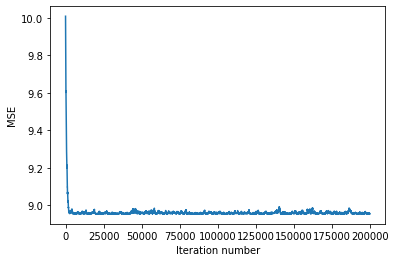

In [20]:
plot_mse(mse)

In [21]:
_, mse = mini_batch_gradient_descent(x, y, [4, 5], batch_num=10000, n=10)

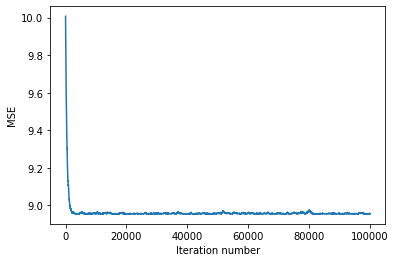

In [22]:
plot_mse(mse)

In [23]:
_, mse = mini_batch_gradient_descent(x, y, [4, 5], batch_num=10000, n=1)

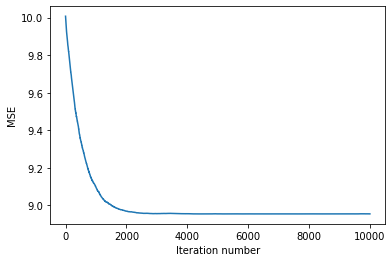

In [24]:
plot_mse(mse)

По графикам видно, что ошибка более устойчива при меньшем количестве итераций на каждый из батчей. Это связано с тем, что при n ≠ 1 и экстрополировании нового батча, ранее полученные результаты становятся менее весомыми.<br>
Из последнего гарфика (n = 1) видно, что оптимальное количество батчей - 5000.

In [25]:
%%time
w, mse = mini_batch_gradient_descent(x, y, [4, 5], batch_num=5000)

CPU times: user 428 ms, sys: 4.22 ms, total: 432 ms
Wall time: 433 ms


In [26]:
print('W: {}. Mini batch gradient descent MSE: {}'.format(w, mse[-1]))

W: [4.5884889  5.84408256]. Mini batch gradient descent MSE: 8.953987952561004


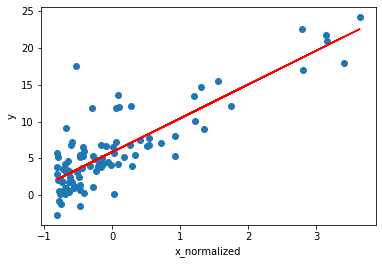

In [27]:
plt.scatter(x.T[0], y)
plt.plot(x.T[0], lin_prediction(x, w), c='r')
plt.xlabel('x_normalized')
plt.ylabel('y')
plt.show()

## 5.3. Stochastic gradient descent

In [28]:
def stochastic_gradient_descent(x, y, w_init, n=450000, alpha=0.001):
    w = w_init
    mse = []
    for j in range(n):
        rand_index = np.random.randint(0, x.shape[0])
        w += gradient(x[rand_index], y[rand_index], x.shape[0], w, alpha)
        mse.append(mserror(y, lin_prediction(x, w)))
    return w, mse

Найдем оптимальное количество эпох по функции ошибки:

In [29]:
_, mse = stochastic_gradient_descent(x, y, [4, 5], n=500000)

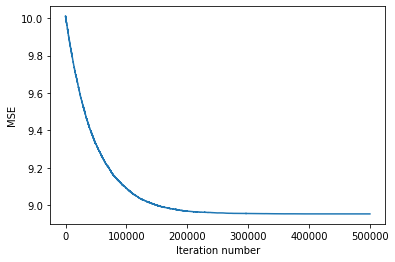

In [30]:
plot_mse(mse)

По графику видим, что после 400 000 эпох ошибка практически не изменяется.

In [31]:
%%time
w, mse = stochastic_gradient_descent(x, y, [4, 5], n=400000)

CPU times: user 13.5 s, sys: 193 ms, total: 13.7 s
Wall time: 13.5 s


In [32]:
print('W: {}. Stochastic gradient descent MSE: {}'.format(w, mse[-1]))

W: [4.58077086 5.8302623 ]. Stochastic gradient descent MSE: 8.954172037395455


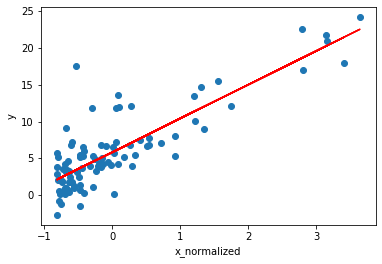

In [33]:
plt.scatter(x.T[0], y)
plt.plot(x.T[0], lin_prediction(x, w), c='r')
plt.xlabel('x_normalized')
plt.ylabel('y')
plt.show()

## 6. sklearn.linear_model.LinearRegression

In [34]:
%%time
reg = LinearRegression().fit(x.T[:-1].T, y)

CPU times: user 734 µs, sys: 144 µs, total: 878 µs
Wall time: 801 µs


In [35]:
print('w1:', reg.coef_, 'w0:', reg.intercept_, 'er:', mserror(y, reg.predict(x.T[:-1].reshape(-1, 1))))

w1: [4.59304113] w0: 5.839135051546391 er: 8.953942751950358


## 7. Анализ

Full batch gradient descent:<br>
<div style="margin-left: 2em">+<br>
    1. Быстрая сходимость (требует малое количесвто итераций)<br>
    2. Возможность распараллеливания алгоритма<br>
    -<br>
    1. Невозможно реализовать при большом обьеме данных из-за ограниченности памяти.

 Mini batch gradient descent:<br>
<div style="margin-left: 2em">+<br>
    1. Относительно быстрая сходимость<br>
    2. Возможность распараллеливания алгоритма<br>

Stochastic gradient descent:<br>
<div style="margin-left: 2em">
    -<br> 
    1. Невозможно распараллелить алгоритм.<br>
    2. Медленная сходимость алгоритма.

sklearn.linear_model.LinearRegression:
<div style="margin-left: 2em">+<br>
    1. Быстро
    2. Удобно
    3. Точно